In [1]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.model_selection import train_test_split
from keras.layers import Input, Conv2D, MaxPooling2D, Dropout
from keras.layers import Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report

In [2]:
data = np.load('dataBeforeTraining/data_28.pkl', allow_pickle=True)
labels = np.load('dataBeforeTraining/one_hot_label_28.pkl', allow_pickle=True)

In [3]:
trainX, valid_testX, trainY, valid_testY = train_test_split(
    data, labels, test_size=0.3, random_state=100)

validX, testX, validY, testY = train_test_split(
    valid_testX, valid_testY, test_size=0.7, random_state=100)

In [4]:
aug = ImageDataGenerator(rotation_range=0.18, zoom_range=0.15,
width_shift_range=0.2, height_shift_range=0.2,
horizontal_flip=True)

In [5]:
model = Sequential()

model.add(Conv2D(input_shape=(28,28,3),
filters=128, kernel_size=(3,3),
padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(filters=256, kernel_size=(3,3),
padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(filters=512, kernel_size=(3,3),
padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(units=120,activation="relu"))
model.add(Dense(units=31, activation="softmax"))

C:\Users\Acer\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 28, 28, 128)         │           3,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 14, 14, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 7, 7, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 7, 7, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 7, 7, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 3, 3, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 3, 3, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 4608)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 120)                 │         553,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 31)                  │           3,751 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,035,743 (7.77 MB)

 Trainable params: 2,035,743 (7.77 MB)

 Non-trainable params: 0 (0.00 B)

In [7]:
# Khởi tạo mô hình Sequential
model1 = Sequential()

# Thêm lớp Input để chỉ định kích thước đầu vào
model1.add(Input(shape=(28, 28, 3)))

# Thêm các lớp Conv2D, MaxPooling2D và Dropout
model1.add(Conv2D(filters=128, kernel_size=(3, 3), padding="same", activation="relu"))
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Dropout(0.4))

model1.add(Conv2D(filters=256, kernel_size=(3, 3), padding="same", activation="relu"))
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Dropout(0.4))

model1.add(Conv2D(filters=512, kernel_size=(3, 3), padding="same", activation="relu"))
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Dropout(0.4))

# Làm phẳng đầu ra trước khi đưa vào lớp Dense
model1.add(Flatten())
model1.add(Dense(units=120, activation="relu"))
model1.add(Dense(units=31, activation="softmax"))

# Tóm tắt mô hình
model1.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 28, 28, 128)         │           3,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 14, 14, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 7, 7, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 7, 7, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 7, 7, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 3, 3, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 3, 3, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 4608)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 120)                 │         553,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 31)                  │           3,751 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,035,743 (7.77 MB)

 Trainable params: 2,035,743 (7.77 MB)

 Non-trainable params: 0 (0.00 B)

In [8]:
epochs = 200
learning_rate = 0.001
batch_size = 64

opt = Adam(learning_rate=learning_rate, beta_1=0.9, beta_2=0.999,
epsilon=1e-07, amsgrad=False, name='Adam')

model.compile(optimizer=opt, metrics=["accuracy"],loss="categorical_crossentropy")

In [9]:
# Tạo callback để lưu mô hình tốt nhất
print("Start training")
H = model. fit(aug.flow(trainX, trainY, batch_size=batch_size),
validation_data=(validX, validY),
steps_per_epoch=trainX.shape[0]//batch_size,
epochs=epochs, verbose=1)

#H = model.fit(train_data, train_labels, epochs= 200, batch_size= 64, validation_data=(test_data, test_labels))

model.save('BienSo_28.h5')
#early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, min_delta=0.001)

Start training
Epoch 1/200


C:\Users\Acer\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


94/94 ━━━━━━━━━━━━━━━━━━━━ 19s 187ms/step - accuracy: 0.1325 - loss: 29.6447 - val_accuracy: 0.6816 - val_loss: 1.5373
Epoch 2/200
 1/94 ━━━━━━━━━━━━━━━━━━━━ 15s 162ms/step - accuracy: 0.4844 - loss: 1.6634

C:\Users\Acer\anaconda3\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.4844 - loss: 1.6634 - val_accuracy: 0.6829 - val_loss: 1.5154
Epoch 3/200
94/94 ━━━━━━━━━━━━━━━━━━━━ 17s 180ms/step - accuracy: 0.5219 - loss: 1.7694 - val_accuracy: 0.9191 - val_loss: 0.5301
Epoch 4/200
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7656 - loss: 1.0269 - val_accuracy: 0.9191 - val_loss: 0.5284
Epoch 5/200
94/94 ━━━━━━━━━━━━━━━━━━━━ 19s 197ms/step - accuracy: 0.7469 - loss: 1.0557 - val_accuracy: 0.9345 - val_loss: 0.3368
Epoch 6/200
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9219 - loss: 0.7708 - val_accuracy: 0.9320 - val_loss: 0.3498
Epoch 7/200
94/94 ━━━━━━━━━━━━━━━━━━━━ 20s 212ms/step - accuracy: 0.7946 - loss: 0.7921 - val_accuracy: 0.9435 - val_loss: 0.2312
Epoch 8/200
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8125 - loss: 0.7160 - val_accuracy: 0.9461 - val_loss: 0.2318
Epoch 9/200
94/94 ━━━━━━━━━━━━━━━━━━━━ 18s 184ms/step - accuracy: 0.8414 - loss: 0.6145 - val_accuracy: 0.9538 - 

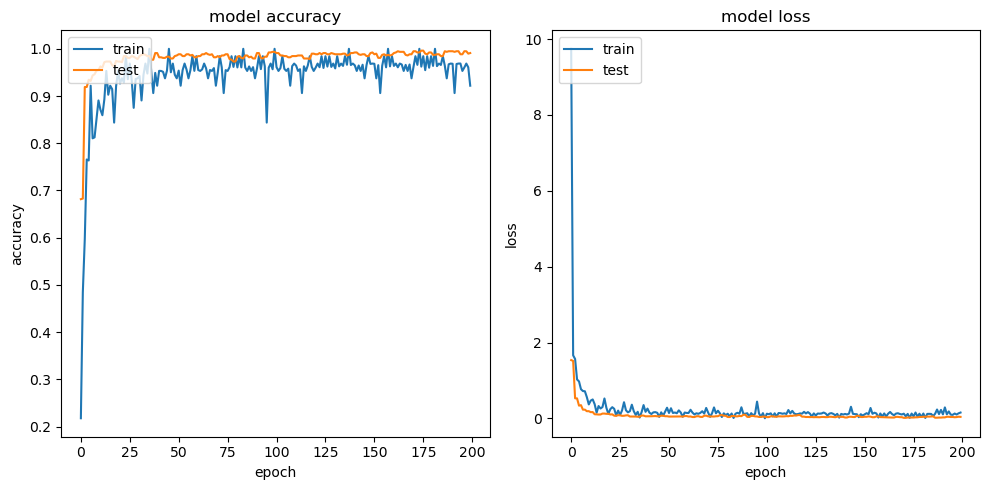

In [10]:
# Vẽ đồ thị độ chính xác
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(H.history['accuracy'], label='train')
plt.plot(H.history['val_accuracy'], label='test')
plt.title('model accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(loc='upper left')

# Vẽ đồ thị hàm mất mát
plt.subplot(1, 2, 2)
plt.plot(H.history['loss'], label='train')
plt.plot(H.history['val_loss'], label='test')
plt.title('model loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

In [11]:
# Evaluate the model on the test data
test_pred = model.predict(testX)
test_pred_class = np.argmax(test_pred, axis=1)
test_true_class = np.argmax(testY, axis=1)

# Calculate Accuracy, Precision, and Recall
accuracy = accuracy_score(test_true_class, test_pred_class)
precision = precision_score(test_true_class, test_pred_class, average='macro')
recall = recall_score(test_true_class, test_pred_class, average='macro')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

# Print the classification report
print("Classification Report:")
print(classification_report(test_true_class, test_pred_class))

57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step
Accuracy: 0.9890049477735019
Precision: 0.9572548108337623
Recall: 0.9394347678929417
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       150
           1       0.99      1.00      1.00       208
           2       0.95      1.00      0.97       151
           3       0.99      1.00      1.00       125
           4       1.00      1.00      1.00       109
           5       1.00      1.00      1.00       281
           6       1.00      1.00      1.00       142
           7       1.00      1.00      1.00       112
           8       0.95      0.99      0.97       118
           9       1.00      1.00      1.00       230
          10       1.00      1.00      1.00         1
          11       0.92      0.67      0.77        18
          12       1.00      1.00      1.00        16
          13       1.00      0.86      0.92         7
          14       1.00      0.88      0

C:\Users\Acer\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Acer\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Acer\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Acer\anaconda3\Lib\site-packages\s